In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
X = df.drop('sales', axis=1)
y = df['sales']

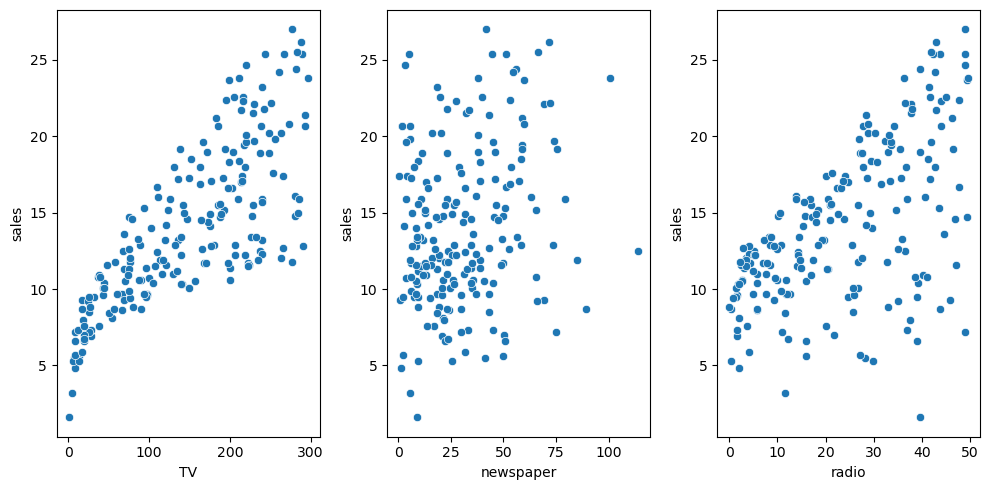

In [156]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.scatterplot(x=X['TV'], y=y)
plt.subplot(1,3,2)
sns.scatterplot(x=X['newspaper'], y=y)
plt.subplot(1,3,3)
sns.scatterplot(x=X['radio'], y=y)

plt.tight_layout()

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [146]:
ob1 = PolynomialFeatures(degree=2, include_bias=False)

In [147]:
polymod = ob1.fit_transform(X)
polymod[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(polymod, y, test_size=0.3, random_state=101)

In [150]:
mod = LinearRegression()

In [151]:
mod.fit(X_train, y_train)

LinearRegression()

In [173]:
y_test.shape

(60,)

In [179]:
y_pred = mod.predict(X_test)

<Axes: xlabel='sales'>

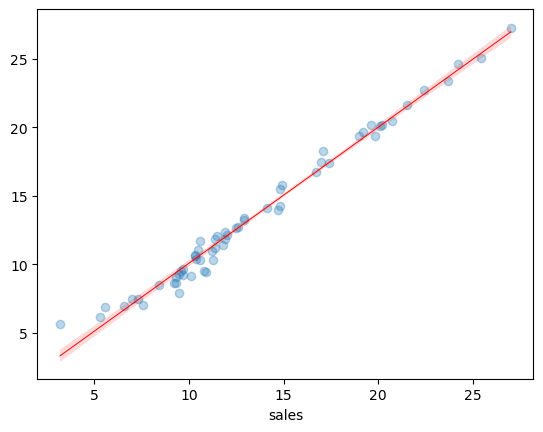

In [180]:
sns.regplot(x= y_test,y= y_pred,scatter_kws={'alpha' : 0.3},line_kws={'lw':0.7,'color':'r'})

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [165]:
mse = mean_squared_error(y_test,y_pred)
np.sqrt(mse)

0.6646431757269275

In [194]:
test_RMSE = []
train_RMSE = []

for i in range(1,10):
    
    ob2 = PolynomialFeatures(degree=i, include_bias=False)
    
    polymod2 = ob2.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(polymod2, y, test_size=0.3, random_state=101)
    
    ob3 = LinearRegression()
    mod3 = ob3.fit(X_train, y_train)
    
    ypredtest = mod3.predict(X_test)
    ypredtrain = mod3.predict(X_train)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,ypredtrain))
    test_rmse = np.sqrt(mean_squared_error(y_test,ypredtest))
    
    train_RMSE.append(train_rmse)
    test_RMSE.append(test_rmse)
    

In [211]:
err = pd.DataFrame({'degree':[1,2,3,4,5,6,7,8,9],'train_RMSE':train_RMSE, 'test_RMSE':test_RMSE})
err

,degree,train_RMSE,test_RMSE
0,1,1.734594,1.516152
1,2,0.587957,0.664643
2,3,0.433934,0.580329
3,4,0.351708,0.507774
4,5,0.250934,2.575825
5,6,0.199407,4.490840
6,7,5.421425,1381.394044
7,8,0.141987,4449.685936
8,9,0.166663,95891.236658


(0.0, 4.6)

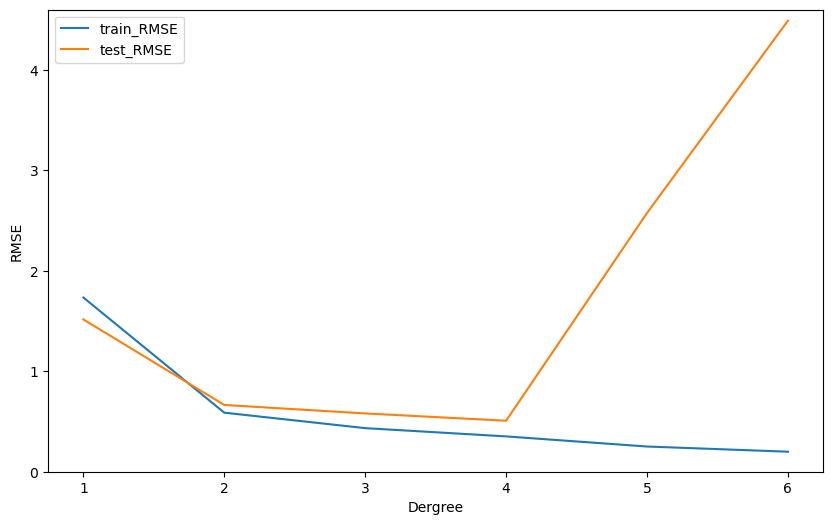

In [233]:

plt.figure(figsize=(10,6))
plt.plot(err['degree'][0:6],err['train_RMSE'][0:6])
plt.plot(err['degree'][0:6],err['test_RMSE'][0:6])
plt.legend(labels=['train_RMSE','test_RMSE'])
plt.xlabel('Dergree')
plt.ylabel('RMSE')
plt.ylim(0,4.6)